<a href="https://colab.research.google.com/github/approjecthub/Machine-learning/blob/master/wage_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:

https://github.com/approjecthub/Machine-learning/blob/master/Datasets/Q1.jpg

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/approjecthub/Machine-learning/master/Datasets/Wage.csv')
print(data.shape)
print(data.columns)
data.head(3)

(3000, 11)
Index(['year', 'age', 'sex', 'maritl', 'race', 'education', 'region',
       'jobclass', 'health', 'health_ins', 'wage'],
      dtype='object')


,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,75.0
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,70.5
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,131.0


In [0]:
data2 = data.copy()

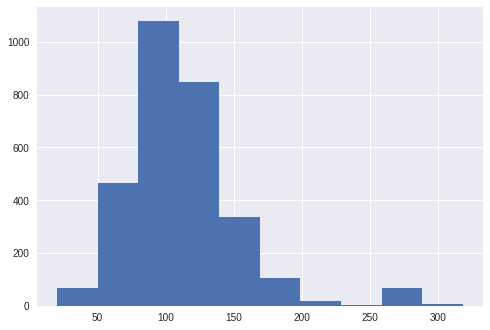

In [5]:
plt.hist(data2['wage'])
plt.show()

Here We want to classify labours whose wages are more than 250.0.
Hence by judging the plot, we can say it is a imbalanced class.


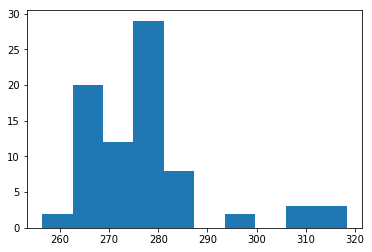

(79, 3000)

In [0]:
g = data2[data2['wage']>=250]
plt.hist(g['wage'])
plt.show()
len(g),len(data2)

In [0]:
g.wage.min(), g.wage.max()

(256.4, 318.3)

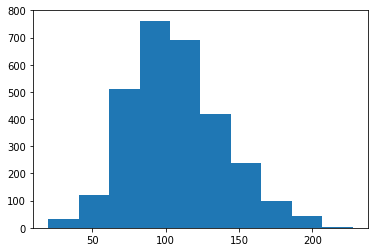

(2921, 79)

In [0]:
l = data2[data2['wage']<250]
plt.hist(l['wage'])
plt.show()
len(l),len(g)

count of salary value less than 250 is 2921 & greater than 250 is 79. Hence it's a imbalance classification problem.

In [0]:
g['wage']=1
l['wage']=0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
X = pd.concat([g,l],axis=0)

In [0]:
np.unique(X.wage)

array([0, 1], dtype=int64)

In [0]:
data2 = X

In [0]:
data.loc[data['wage'].idxmax()]

year                        2007
age                           63
sex                      1. Male
maritl                2. Married
race                    2. Black
education     5. Advanced Degree
region        2. Middle Atlantic
jobclass          2. Information
health            2. >=Very Good
health_ins                1. Yes
wage                       318.3
Name: 206, dtype: object

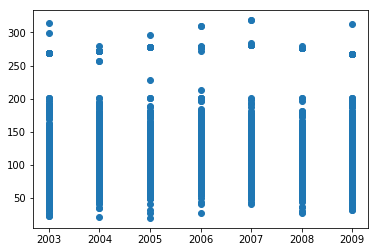

In [0]:
#relation between year & wage
plt.scatter(data['year'],data['wage'])

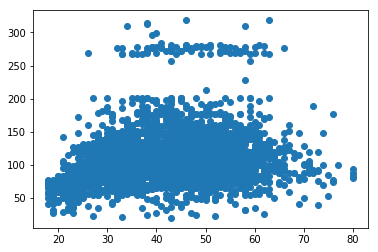

In [0]:
#relation between age & wage
plt.scatter(data['age'],data['wage'])

In [0]:
data2.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,wage
25,2005,49,1. Male,2. Married,1. White,5. Advanced Degree,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,1
46,2009,35,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,1
52,2004,43,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,1
76,2003,60,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,1
118,2008,38,1. Male,2. Married,1. White,5. Advanced Degree,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,1


In [0]:
print(np.unique(data2.maritl))
print(np.unique(data2.race))
print(np.unique(data2.education))
print(np.unique(data2.region))
print(np.unique(data2.jobclass))
print(np.unique(data2.health))
print(np.unique(data2.health_ins))

['1. Never Married' '2. Married' '3. Widowed' '4. Divorced' '5. Separated']
['1. White' '2. Black' '3. Asian' '4. Other']
['1. < HS Grad' '2. HS Grad' '3. Some College' '4. College Grad'
 '5. Advanced Degree']
['2. Middle Atlantic']
['1. Industrial' '2. Information']
['1. <=Good' '2. >=Very Good']
['1. Yes' '2. No']


In [0]:
data2.drop(columns=['year'], inplace=True)

In [0]:
le = preprocessing.LabelEncoder()
#le.fit(data2[['sex','maritl','race','education','region','jobclass','health','health_ins']])
data2['data2maritl'] = le.fit_transform(data2.maritl)
data2['data2race'] = le.fit_transform(data2.race)
data2['data2education'] = le.fit_transform(data2.education)
data2['data2region'] = le.fit_transform(data2.region)
data2['data2jobclass'] = le.fit_transform(data2.jobclass)
data2['data2health'] = le.fit_transform(data2.health)
data2['data2health_ins'] = le.fit_transform(data2.health_ins)

In [0]:
data2.drop(columns=['sex','maritl','race','education','region','jobclass','health','health_ins'],inplace=True)

In [0]:
data2.head()

,age,wage,data2maritl,data2race,data2education,data2region,data2jobclass,data2health,data2health_ins
25,49,1,1,0,4,0,1,1,0
46,35,1,1,0,3,0,0,1,0
52,43,1,1,0,3,0,0,1,0
76,60,1,1,0,3,0,0,1,0
118,38,1,1,0,4,0,0,0,0


In [0]:
y = data2.wage
data2.drop(columns='wage', inplace=True)
X = data2

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print('np.bincount(y_train):\n',np.bincount(y_train),'\n')

np.bincount(y_train):
 [2191 2191] 



In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('confusion_matrix:\n',confusion_matrix(y_test, y_pred),'\n')

print('accuracy_score: ',accuracy_score(y_test, y_pred),'\n')

print('recall_score: ',recall_score(y_test, y_pred),'\n')

confusion_matrix:
 [[542 188]
 [  4  16]] 

accuracy_score:  0.744 

recall_score:  0.8 



In [0]:
#from sklearn.naive_bayes import GaussianNB
#clf = GaussianNB()

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('confusion_matrix:\n',confusion_matrix(y_test, y_pred),'\n')

print('accuracy_score: ',accuracy_score(y_test, y_pred),'\n')

print('recall_score: ',recall_score(y_test, y_pred),'\n')

confusion_matrix:
 [[603 127]
 [  8  12]] 

accuracy_score:  0.82 

recall_score:  0.6 

